In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [342]:
# read the data
data = pd.read_csv('C:\\Users\\selene\\Desktop\\term-deposit-marketing-2020.csv')

In [343]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [344]:
data.shape

(40000, 14)

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [346]:
# check missing data
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [347]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


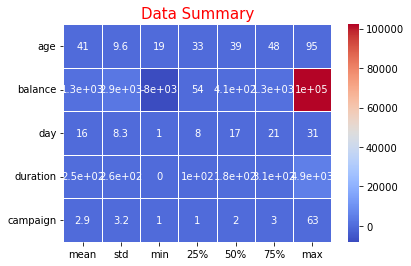

In [348]:
# show data summary
sns.heatmap(data.describe()[1:].transpose(),annot=True,linewidths=.5,linecolor="white",cmap="coolwarm")
plt.title("Data Summary",fontsize=(15),color="red")
plt.show()

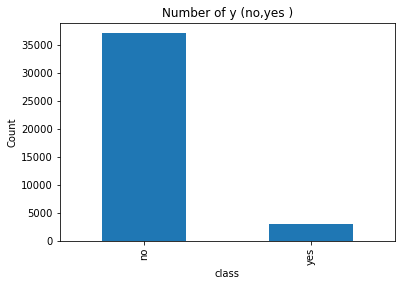

In [349]:
# check data balanced
plt.figure()
pd.Series(data['y']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of y (no,yes )');

# Data Exploration

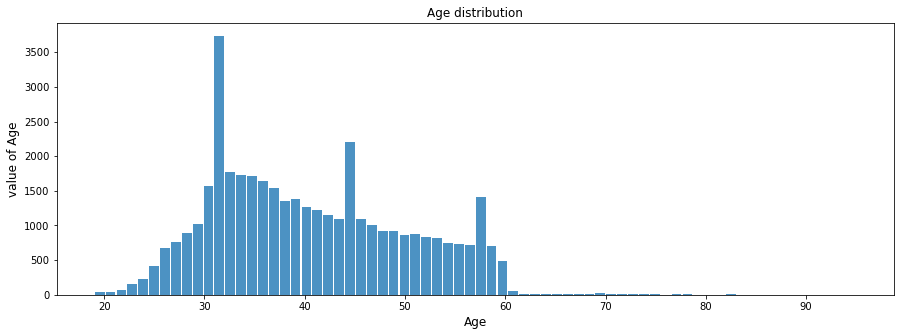

In [350]:
# observe age variable distribution
plt.figure(figsize=(15,5))
plt.hist(data.age,bins=70,alpha=0.8,rwidth=0.9)
plt.title("Age distribution")
plt.ylabel('value of Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
 
plt.show()

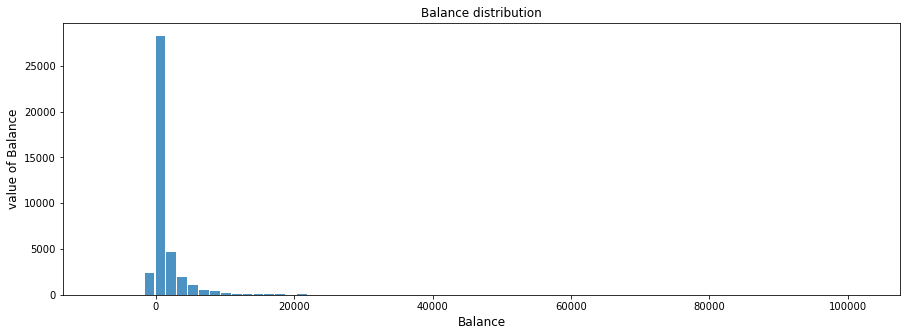

In [351]:
# observe balance variable distribution
plt.figure(figsize=(15,5))
plt.hist(data.balance,bins=70,alpha=0.8,rwidth=0.9)
plt.title("Balance distribution")
plt.ylabel('value of Balance', fontsize=12)
plt.xlabel('Balance', fontsize=12)
 
plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


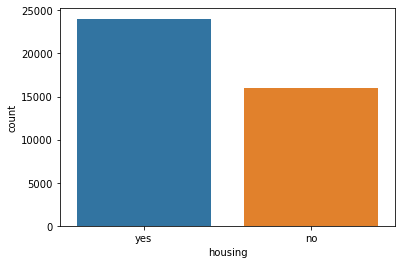

In [352]:
# observe housing variable distribution
sns.countplot(data.housing)
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


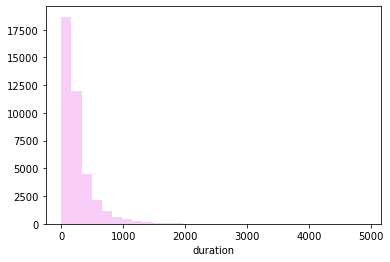

In [353]:
# observe duration variable distribution
sns.distplot(data["duration"],kde=False,bins=30,color="violet")
plt.show()

In [354]:
# change categorial datatype using LabelEncode
from sklearn.preprocessing import LabelEncoder
data_categorial =  data[['job','marital','education','default','housing','loan','contact','month','y']]
data_numerical = data[['age','balance','day','duration','campaign']]
label_encoders = {}
categorical_columns = data_categorial.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_categorial[column] = label_encoders[column].fit_transform(data_categorial[column])

C:\Users\selene\AppData\Local\Temp/ipykernel_46708/115049257.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorial[column] = label_encoders[column].fit_transform(data_categorial[column])


In [355]:
data_categorial.head(5)

,job,marital,education,default,housing,loan,contact,month,y
0,4,1,2,0,1,0,2,8,0
1,9,2,1,0,1,0,2,8,0
2,2,1,1,0,1,1,2,8,0
3,1,1,3,0,1,0,2,8,0
4,11,2,3,0,0,0,2,8,0


In [356]:
# concat features data and labels
data = pd.concat([data_categorial,data_numerical], axis=1)

In [357]:
data.head(5)

,job,marital,education,default,housing,loan,contact,month,y,age,balance,day,duration,campaign
0,4,1,2,0,1,0,2,8,0,58,2143,5,261,1
1,9,2,1,0,1,0,2,8,0,44,29,5,151,1
2,2,1,1,0,1,1,2,8,0,33,2,5,76,1
3,1,1,3,0,1,0,2,8,0,47,1506,5,92,1
4,11,2,3,0,0,0,2,8,0,33,1,5,198,1


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

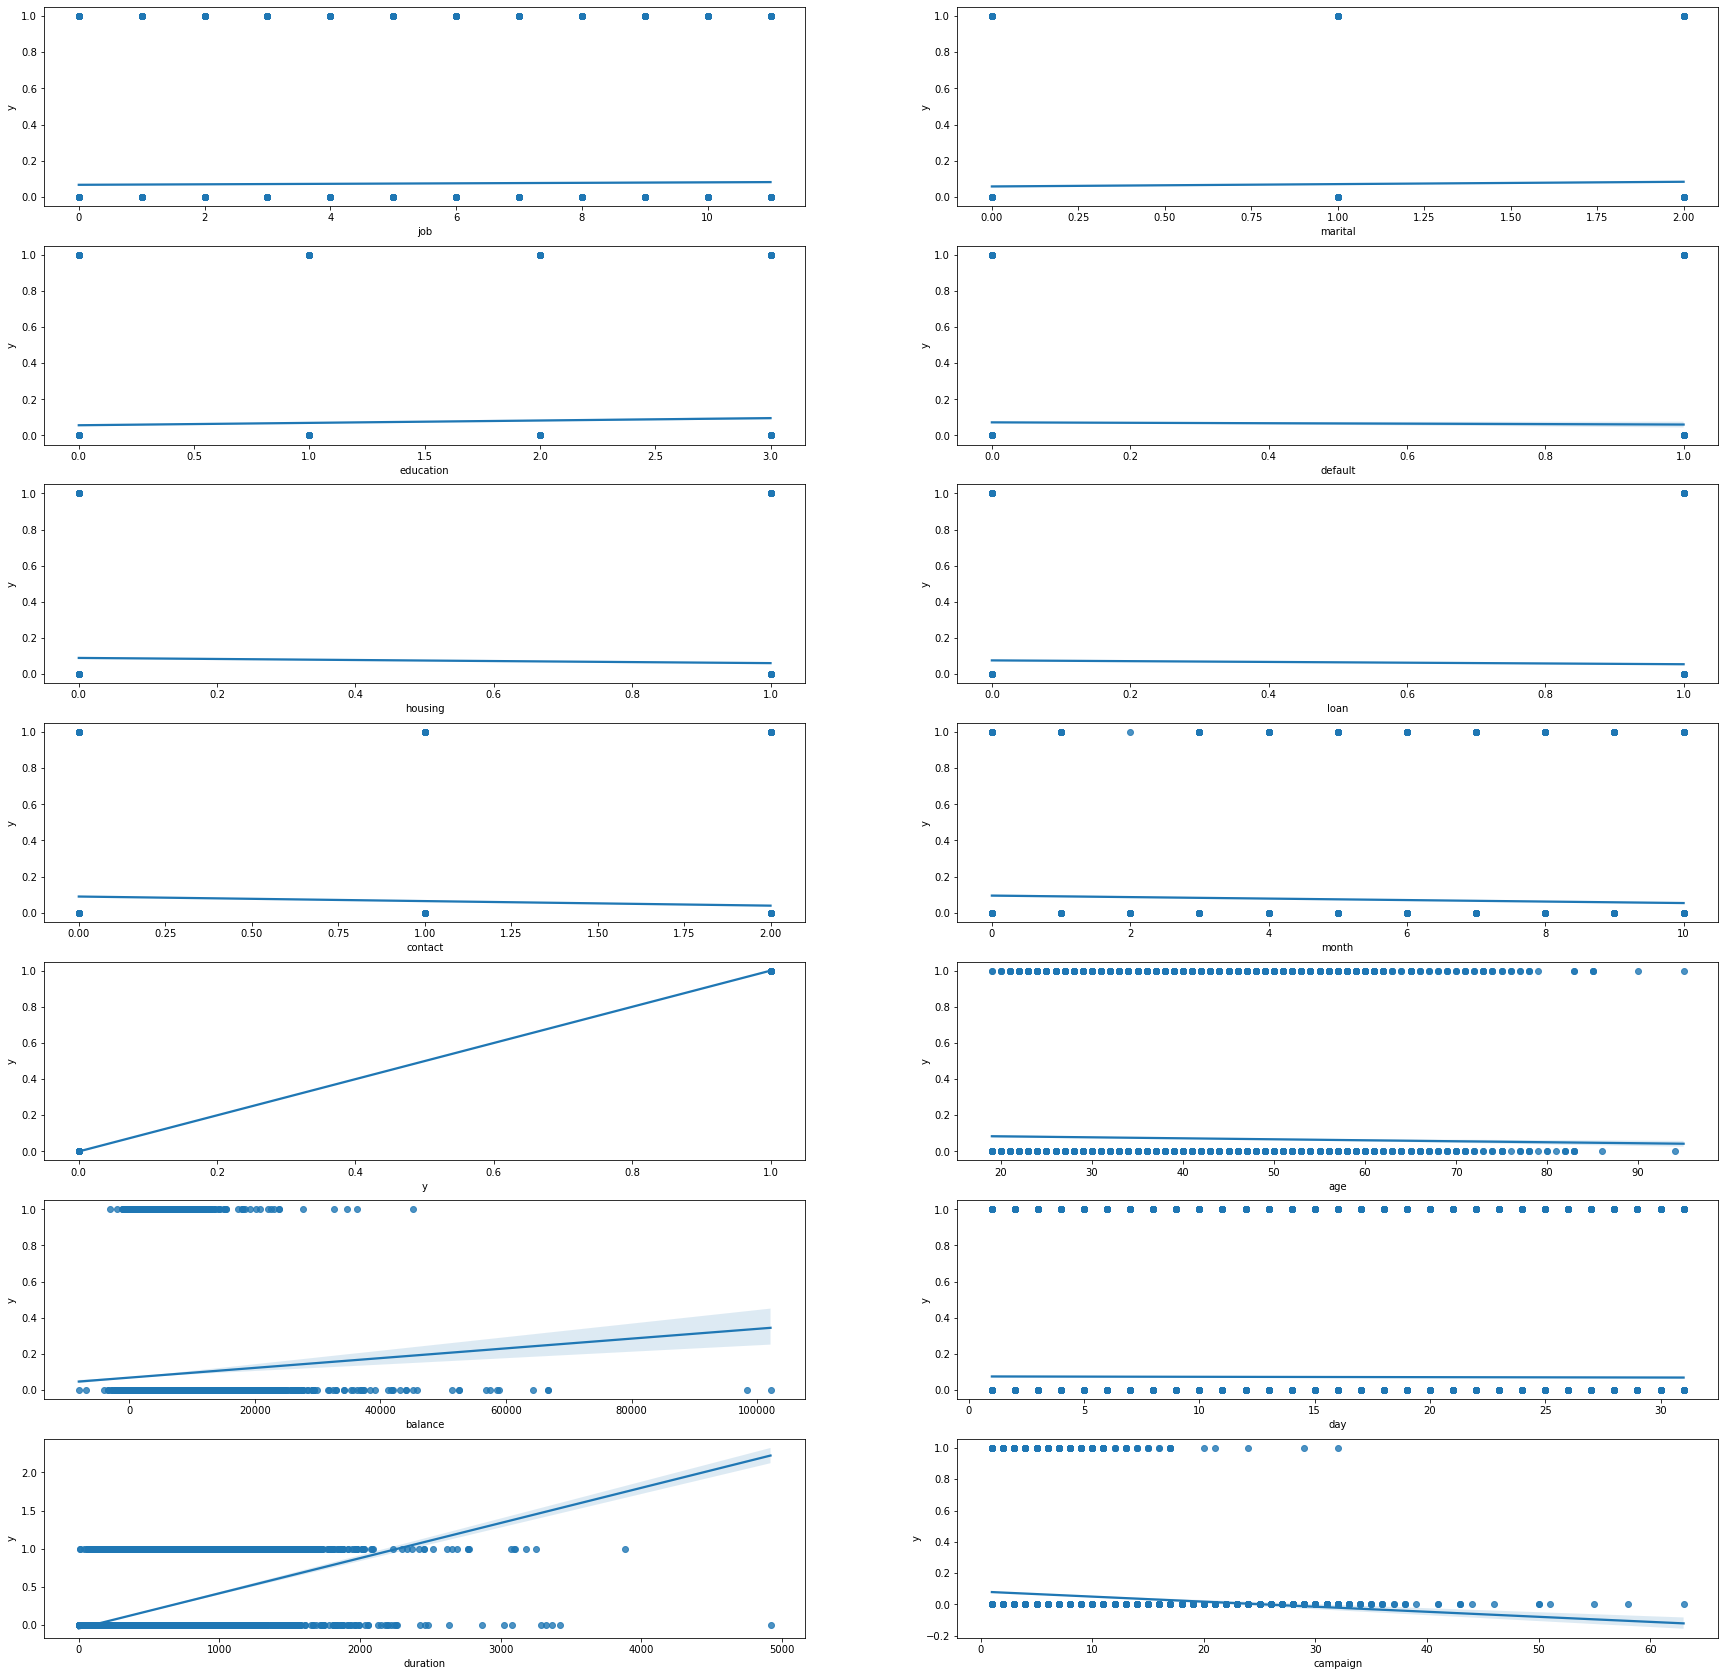

In [358]:
"""
from the below graph, we can observe that categorical data does not fit for this graph. So let us analyze the numerail data e.g.age,balance,
day,duration,campaign.

There are some unusually high values for age > 85(both for 0 and 1),balance> 30000(for 1) and balance around 100000(for 0), duration around 
4000(for 1) and 5000(for 0), compaign>50(for 0) and around 30(for 1).
"""



import seaborn as sns
# Outlier Analysis
fig = plt.figure(figsize=[30,30])
for col,i in zip(data.columns,range(1,15)):
    axes = fig.add_subplot(7,2,i)
    sns.regplot(data[col],data['y'],data=data)
plt.show()


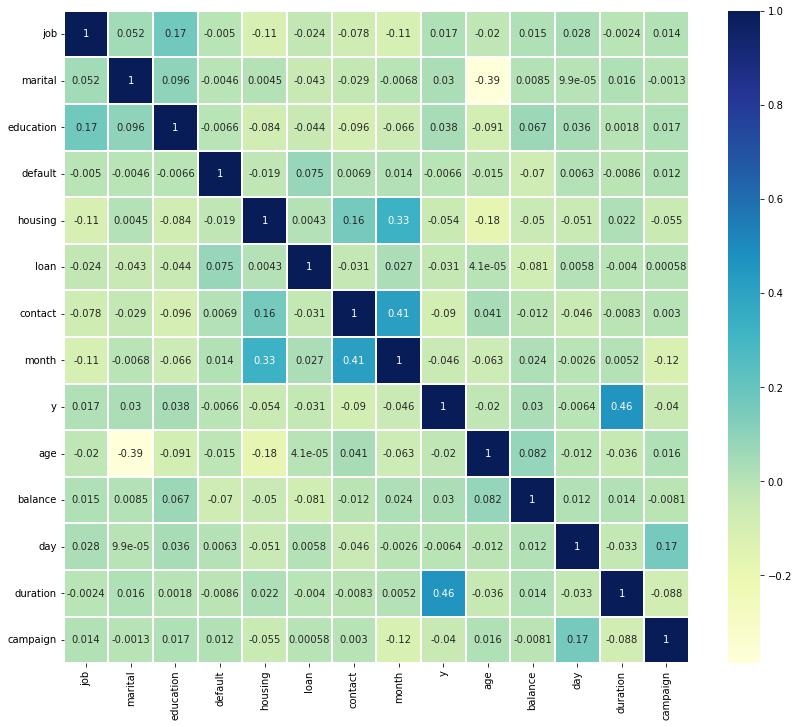

In [359]:
# Variables correlation
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Feature Selection

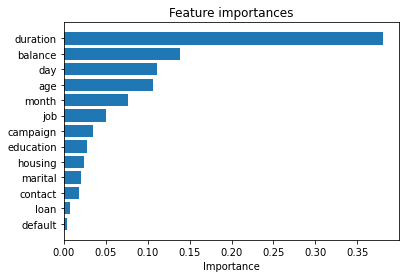

In [322]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
y = data['y']
data.drop('y', axis=1, inplace = True)
clf = DecisionTreeClassifier()
clf = clf.fit(data,y)
features_list = data.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,4))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()


In [327]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem
from imblearn.over_sampling import SMOTE
X_balance,Y_balance = SMOTE().fit_resample(data,y)
X_balance = pd.DataFrame(X_balance, columns = data.columns)

# Xgboost

In [334]:
# Train Model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score
x_train, x_test, y_train, y_test = train_test_split( X_balance,Y_balance, test_size=0.3, random_state=26)
scoring = 'roc_auc'
kfold = StratifiedKFold(n_splits=5, shuffle=True , random_state = 47)
model=XGBClassifier(n_estimators=200,max_depth=3,learning_rate=0.15, subsample=0.5)
cv_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
cv_results

array([0.98094145, 0.98199154, 0.98299344, 0.98064742, 0.98176337])

In [336]:
# Test Model
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('XGBoost Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predict)))
print('\nXGBoost Classifier Precision: {:.3f}'.format(precision_score (y_test, y_predict)))
print('\nXGBoost Classifier Recall: {:.3f}'.format(recall_score (y_test, y_predict)))

XGBoost Classifier Accuracy: 0.929

XGBoost Classifier Precision: 0.917

XGBoost Classifier Recall: 0.942


# Lightgbm

In [338]:
# Train Model
import lightgbm as lgb
model=lgb.LGBMClassifier()
cv_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
cv_results

array([0.98553923, 0.98639821, 0.98727118, 0.98537631, 0.98555241])

In [340]:
# Test Model
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('lightgbm Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predict)))
print('\n lightgbm Classifier Precision: {:.3f}'.format(precision_score (y_test, y_predict)))
print('\n lightgbm Classifier Recall: {:.3f}'.format(recall_score (y_test, y_predict)))

lightgbm Classifier Accuracy: 0.937

 lightgbm Classifier Precision: 0.926

 lightgbm Classifier Recall: 0.950
